In [16]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df.shape

(21613, 21)

In [18]:
dfpricebysqft_living = df[['price', 'sqft_living']]

In [23]:
import numpy as np
X = dfpricebysqft_living[['sqft_living']].as_matrix()
y = dfpricebysqft_living[['price']].as_matrix()
X.shape

(21613, 1)

In [20]:
import matplotlib.pyplot as plt
dfpricebysqft_living.plot.scatter('sqft_living','price')

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.coef_,lr.intercept_

(array([[ 280.6235679]]), array([-43580.74309447]))

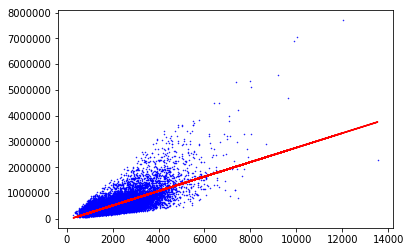

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color='blue', s=0.25)
plt.plot(X,lr.intercept_+X*lr.coef_, color='red')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape

(17290, 1)

In [42]:
lr.fit(X_train, y_train)
train_predicted = lr.predict(X_train)

In [43]:
import numpy as np
print('Fit a model X_train, and calculate MSE with Y_train:', \
      np.mean((y_train-lr.predict(X_train)) ** 2))
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', \
      np.mean((y_test-lr.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 69659212573.0
Fit a model X_train, and calculate MSE with X_test, Y_test: 63125076972.1


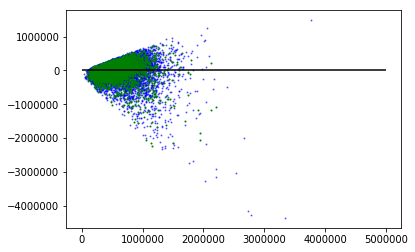

In [51]:
plt.scatter(train_predicted , train_predicted - y_train, c = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)
plt.scatter(test_predicted , test_predicted - y_test, c = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, c='r')
plt.show()

In [52]:
from sklearn import metrics
metrics.r2_score(y_test, test_predicted)

0.49643884761404222